Frequência natural não amortecida ωn = 10.000 rad/s
Fator de amortecimento ξ = 0.200


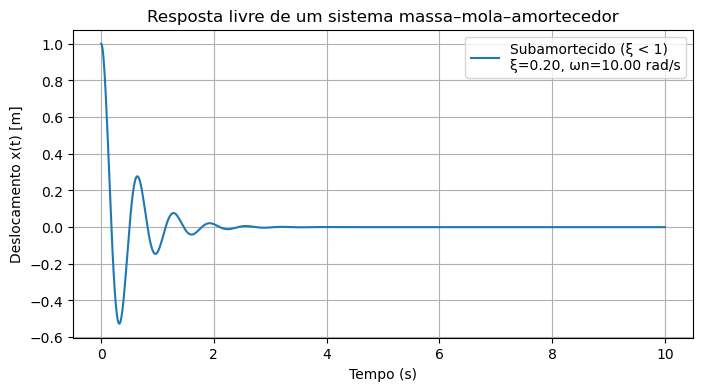

In [2]:
"""
Simulação do movimento amortecido (massa–mola–amortecedor)
------------------------------------------------------------
Baseado nas equações mostradas no resumo:
    m*x'' + c*x' + k*x = 0

O programa calcula o fator de amortecimento ξ, a frequência natural ωn,
a frequência amortecida ωd e plota o gráfico da resposta x(t)
para diferentes condições de amortecimento.

Autor: GPT-5 (exemplo educativo)
"""

import numpy as np
import matplotlib.pyplot as plt

# ==== PARÂMETROS DO SISTEMA ====
m = 1.0      # massa (kg)
k = 100.0    # rigidez (N/m)
c = 4.0      # coeficiente de amortecimento (N·s/m)

x0 = 1.0     # deslocamento inicial (m)
v0 = 0.0     # velocidade inicial (m/s)

# ==== CÁLCULOS ====
wn = np.sqrt(k/m)                   # frequência natural não amortecida [rad/s]
xi = c / (2*np.sqrt(k*m))           # fator de amortecimento
wd = wn * np.sqrt(1 - xi**2) if xi < 1 else 0  # frequência amortecida

print(f"Frequência natural não amortecida ωn = {wn:.3f} rad/s")
print(f"Fator de amortecimento ξ = {xi:.3f}")

# ==== GERAÇÃO DO GRÁFICO ====
t = np.linspace(0, 10, 1000)

if xi < 1:
    # Sistema subamortecido
    A = x0
    B = (v0 + xi*wn*x0)/wd
    x = np.exp(-xi*wn*t) * (A*np.cos(wd*t) + B*np.sin(wd*t))
    tipo = "Subamortecido (ξ < 1)"
elif xi == 1:
    # Sistema criticamente amortecido
    x = (x0 + (v0 + wn*x0)*t)*np.exp(-wn*t)
    tipo = "Criticamente amortecido (ξ = 1)"
else:
    # Sistema superamortecido
    r1 = -wn*(xi - np.sqrt(xi**2 - 1))
    r2 = -wn*(xi + np.sqrt(xi**2 - 1))
    A = (v0 - r2*x0)/(r1 - r2)
    B = x0 - A
    x = A*np.exp(r1*t) + B*np.exp(r2*t)
    tipo = "Superamortecido (ξ > 1)"

# ==== PLOT ====
plt.figure(figsize=(8,4))
plt.plot(t, x, label=f'{tipo}\nξ={xi:.2f}, ωn={wn:.2f} rad/s')
plt.title('Resposta livre de um sistema massa–mola–amortecedor')
plt.xlabel('Tempo (s)')
plt.ylabel('Deslocamento x(t) [m]')
plt.grid(True)
plt.legend()
plt.show()
